In [35]:
import pandas as pd

In [36]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
inputs = df.drop(["PassengerId","Survived","Name","SibSp","Parch","Ticket","Cabin","Embarked"],axis = 1)
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [38]:
target = df.Survived
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
l_sex = LabelEncoder()
inputs["l_Sex"] = l_sex.fit_transform(inputs["Sex"])
inputs

,Pclass,Sex,Age,Fare,l_Sex
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1
...,...,...,...,...,...
886,2,male,27.0,13.0000,1
887,1,female,19.0,30.0000,0
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [41]:
l_inputs = inputs.drop("Sex",axis=1)
l_inputs

,Pclass,Age,Fare,l_Sex
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
input_train,input_test,target_train,target_test = train_test_split(l_inputs,target,test_size=0.1)

In [44]:
from sklearn import tree

In [45]:
model = tree.DecisionTreeClassifier()
model.fit(input_train,target_train)

DecisionTreeClassifier()

In [46]:
model.score(input_test,target_test)

0.7666666666666667

In [47]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [48]:
target_predicted = model.predict(input_test)
cm = confusion_matrix(target_test,target_predicted)
cm

array([[51,  9],
       [12, 18]], dtype=int64)

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(95.72222222222221, 0.5, 'predicted value')

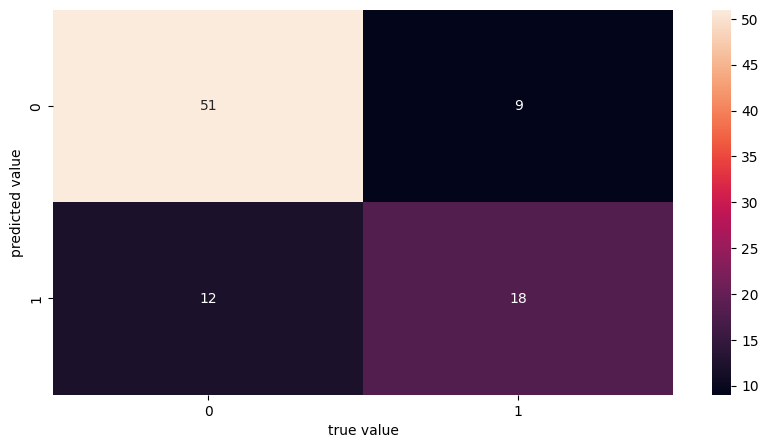

In [51]:
plt.figure(figsize =(10,5))
sn.heatmap(cm,annot = True)
plt.xlabel("true value")
plt.ylabel("predicted value")